# Logistic  Regression 

## Information for Action Project 

In [ ]:
#Project Brief
#I came up with a model on to predict the information source/platform that would elicit action on our target group. Information was being shared on the infomail, organization website, twitter, and facebook. The model helped the organization to do more targeted information sharing and have people take action towards saving forest and averting climate change.

In [15]:
#importing the libraries 
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [16]:
#importing the data and assigning the dependent and the independent variables 
df = pd.read_csv('information_for_action.csv')
X= df.drop('action',1)
y = df['action']

In [17]:
#Confirming the independent variables 
X

twitter  infomail   website  facebook
0          6        148       72        35
1          1         85       66        29
2          8        183       64         0
3          1         89       66        23
4          0        137       40        35
..       ...        ...      ...       ...
763       10        101       76        48
764        2        122       70        27
765        5        121       72        23
766        1        126       60         0
767        1         93       70        31

[768 rows x 4 columns]

In [18]:
#Confirming the dependent variable
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: action, Length: 768, dtype: int64

In [19]:
#exploring the data,printing the first five rows
df.head()

twitter  infomail   website  facebook  action
0        6        148       72        35       1
1        1         85       66        29       0
2        8        183       64         0       1
3        1         89       66        23       0
4        0        137       40        35       1

In [20]:
#exploring the data,computing the descriptive statistics
df.describe()

twitter   infomail      website    facebook      action
count  768.000000  768.000000  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469   20.536458    0.348958
std      3.369578   31.972618   19.355807   15.952218    0.476951
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      1.000000   99.000000   62.000000    0.000000    0.000000
50%      3.000000  117.000000   72.000000   23.000000    0.000000
75%      6.000000  140.250000   80.000000   32.000000    1.000000
max     17.000000  199.000000  122.000000   99.000000    1.000000

In [21]:
#exploring the correlations between the variables 
df.corr()

twitter  infomail    website  facebook    action
twitter    1.000000   0.129459  0.141282 -0.081672  0.221898
infomail   0.129459   1.000000  0.152590  0.057328  0.466581
website    0.141282   0.152590  1.000000  0.207371  0.065068
facebook  -0.081672   0.057328  0.207371  1.000000  0.074752
action     0.221898   0.466581  0.065068  0.074752  1.000000

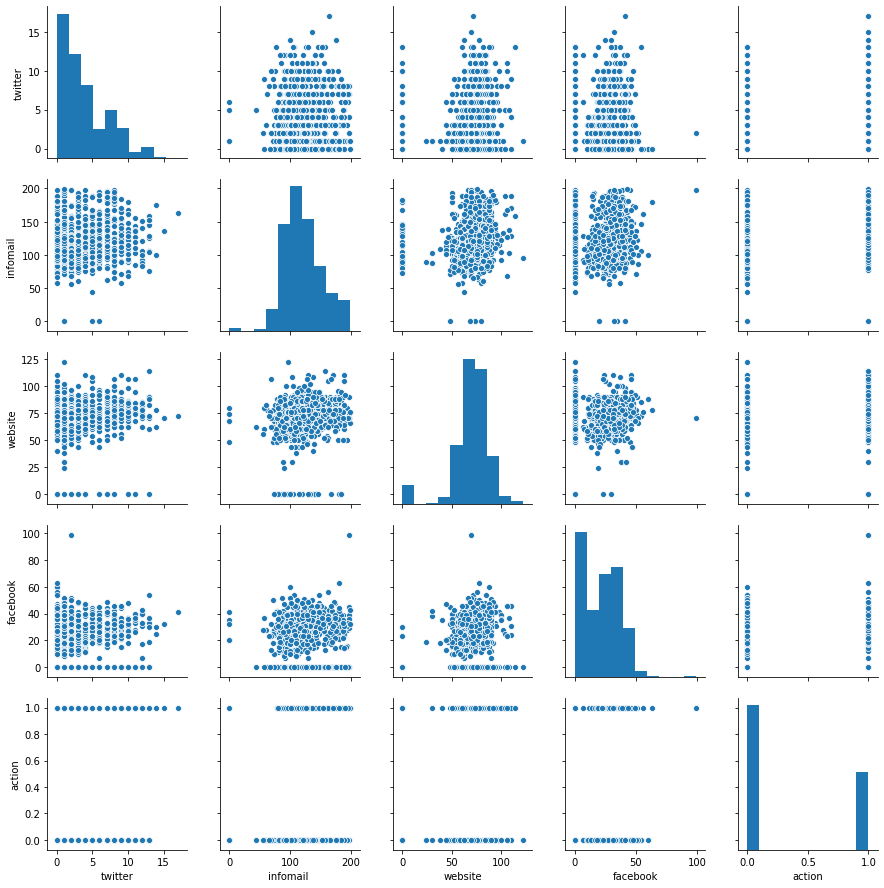

In [22]:
#Exploring the data through visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

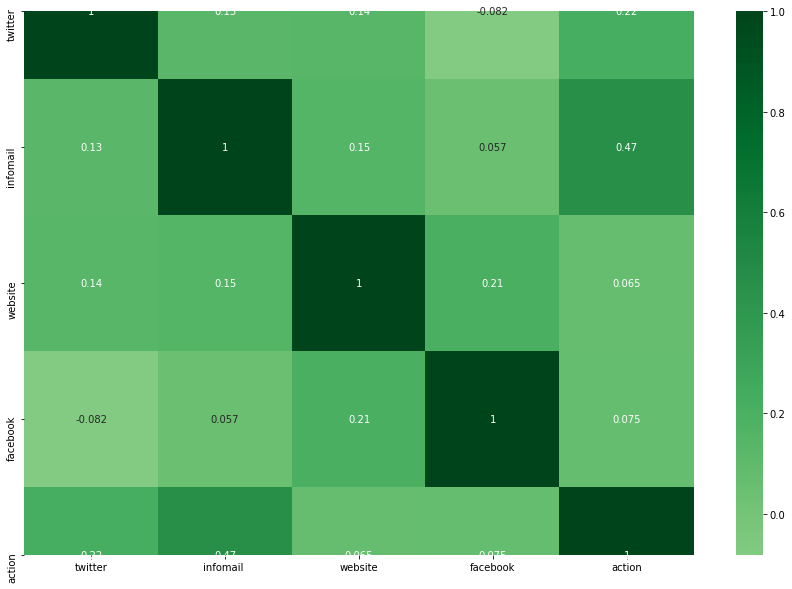

In [23]:
#Visualizing the correlation analysis
fig = plt.figure(figsize = [15,10])
sns.heatmap(df.corr(),annot = True, cmap = 'Greens', center = 0)
plt.show()

In [28]:
#Importing libraries and splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [29]:
#Training the logistic regression classifier 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#Printing out the logistic regression model
logmodel = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model = logmodel.fit()
model.summary()

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 action   No. Observations:                  537
Model:                            GLM   Df Residuals:                      532
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.32
Date:                Mon, 28 Dec 2020   Deviance:                       550.64
Time:                        20:35:18   Pearson chi2:                     730.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3921      0.583     -9.241      0.000      -6.536      -4.249
twitter        0.1114      0.031      3.567      0.000       0.050       0.173
infomail       0.0349      0.004      8.987      0.000       0.027       0.043
website       -0.0034      0.005     -0.628      0.530      -0.014       0.007
facebook       0.0066      0.007      0.987      0.324      -0.007       0.020
==============================================================================
"""

In [31]:
#Printing out the probabilities 
y_train_pred = model.predict(sm.add_constant(X_train)).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'action':y_train.values, 'action_prob':y_train_pred})
y_train_pred_final.head()

action  action_prob
0       0     0.203112
1       0     0.206093
2       1     0.251681
3       0     0.279512
4       1     0.712938

In [33]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_train_pred)
print(cm)
accuracy_score(y_test, y_train_pred)

[[129  11]
 [ 45  46]]


0.7575757575757576